In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
# Importing Data
df_train = pd.read_csv('train_tweet.csv')
df_test = pd.read_csv('test_tweet.csv')
submission = pd.read_csv('sample_submission.csv')

In [158]:
df_train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [159]:
df_test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [160]:
# Set Index to Id
df_train.set_index('id', inplace=True)
df_test.set_index('id', inplace=True)

In [161]:
df_train.shape

(31962, 2)

In [162]:
(df_train['label'].value_counts()/len(df_train))*100

0    92.98542
1     7.01458
Name: label, dtype: float64

In [163]:
#merging Data
data = pd.concat([df_train, df_test])

# Preprocessing Data :
1. Removing Twitter Handlers (@User)
2. Remove Punctuation, special character, Number
3. Remove Short Word
4. Tokenization
5. Lowering Words
6. Remove StopWords
7. Lemmatizing

## Removing Twitter Handlers

In [164]:
#import regex liblary
import re

#Define Function to remove Pattern
def remove_pattern(pattern, text) :
    r = re.findall(pattern, text)
    
    for i in r :
        text = re.sub(i, '', text)
        
    return text

In [165]:
# User Function To remove Some Twwiter Pattern
pattern = r'@[\w]*'
data['clean_tweet'] = data['tweet'].apply(lambda x : remove_pattern(pattern, x))

In [166]:
data['clean_tweet'].head(10)

id
1       when a father is dysfunctional and is so sel...
2       thanks for #lyft credit i can't use cause th...
3                                   bihday your majesty
4     #model   i love u take with u all the time in ...
5                factsguide: society now    #motivation
6     [2/2] huge fan fare and big talking before the...
7                      camping tomorrow        dannyâ¦
8     the next school year is the year for exams.ð...
9     we won!!! love the land!!! #allin #cavs #champ...
10                welcome here !  i'm   it's so #gr8 ! 
Name: clean_tweet, dtype: object

## Removing Punctuation, Number, Special Character

In [167]:
# Clean data except for some character

import string

data['clean_tweet'] = data['clean_tweet'].str.replace("[^a-zA-Z#]", " ")

## Remove Short Words

In [168]:
# Remove word <=3
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [169]:
data['clean_tweet'].head()

id
1    when father dysfunctional selfish drags kids i...
2    thanks #lyft credit cause they offer wheelchai...
3                                  bihday your majesty
4                           #model love take with time
5                       factsguide society #motivation
Name: clean_tweet, dtype: object

## Tokenization

In [170]:
# Tokenizing Dat
from nltk import word_tokenize

data['clean_tweet'] = data['clean_tweet'].apply(lambda x : x.split())

In [171]:
data['clean_tweet'].head()

id
1    [when, father, dysfunctional, selfish, drags, ...
2    [thanks, #lyft, credit, cause, they, offer, wh...
3                              [bihday, your, majesty]
4                     [#model, love, take, with, time]
5                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

## Lowering Words

In [172]:
# Lowering All Data

data['clean_tweet'] = data['clean_tweet'].apply(lambda x : [w.lower() for w in x])

## Remove StopWords

In [173]:
# import stopwords
from nltk.corpus import stopwords

# get english stopwords
english_stops = stopwords.words('english')

# Remove Stop Words From Data
data['clean_tweet'] = data['clean_tweet'].apply(lambda x : [w for w in x if w not in english_stops])

In [174]:
data['clean_tweet'].head()

id
1    [father, dysfunctional, selfish, drags, kids, ...
2    [thanks, #lyft, credit, cause, offer, wheelcha...
3                                    [bihday, majesty]
4                           [#model, love, take, time]
5                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

## Lemmatizing

In [175]:
# Import Lemmatizing Method
from nltk.stem import WordNetLemmatizer

# Define Lemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize data
data['clean_tweet'] = data['clean_tweet'].apply(lambda x : [wordnet_lemmatizer.lemmatize(w) for w in x])

In [176]:
data['clean_tweet'].head()

id
1    [father, dysfunctional, selfish, drag, kid, dy...
2    [thanks, #lyft, credit, cause, offer, wheelcha...
3                                    [bihday, majesty]
4                           [#model, love, take, time]
5                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

# Visualization

1. WordCloud
    - What is the common word in all Data
    - What is the common word in Phostive Sentiment
    - What is the common word in negative Sentiment


In [177]:
# ovewrite the new df_train and df_test with clean word
df_train = data.iloc[:31962, :]
df_test = data.iloc[31962:, :]

In [178]:
# Merging All The words in Data
all_words = []
for i in range(1, 1+len(data.iloc[1:])) :
    all_words += data.iloc[i, 2]

In [179]:
len(all_words)

330083

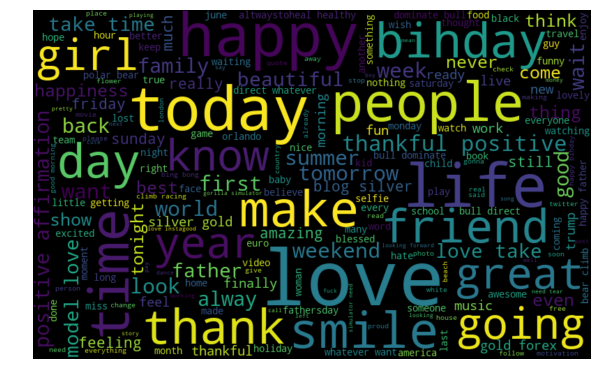

In [180]:
# What Is The common word in all Data
from wordcloud import WordCloud

wc = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(all_words))

plt.figure(figsize=(10, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

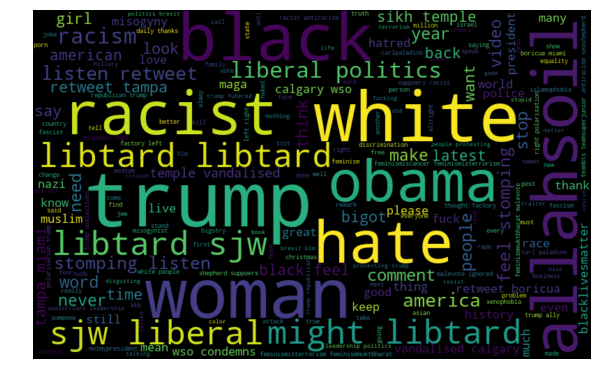

In [181]:
#get all word in negative sentiment
n_idx = data[data['label']==1]['clean_tweet'].index
n_word = []
for i in n_idx :
    n_word += data['clean_tweet'][i]
    
#Show the WordCloud
wc_n = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(n_word))

plt.figure(figsize=(10, 7))
plt.imshow(wc_n, interpolation="bilinear")
plt.axis('off')
plt.show()

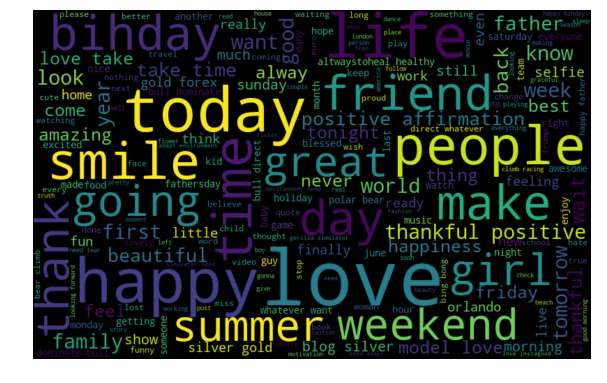

In [182]:
#Now we make wordcloud for negatif sentiment

#get all word in negative label
p_idx = data[data['label']==0]['clean_tweet'].index
p_word = []
for i in p_idx :
    p_word += data['clean_tweet'][i]
    
#Show the WordCloud
wc_p = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(p_word))

plt.figure(figsize=(10, 7))
plt.imshow(wc_p, interpolation="bilinear")
plt.axis('off')
plt.show()

# Collecting Hastag
Hastag is special character in twitter, it's reflect the trend in twitter world, every hastgag's word telling some topic, and that hashtag summarize the emotion about what is going on in the twitter. so, we will collect all the hashtag in the twitter, and count it.

In [206]:
# collect hashtag in All Data
find_hashtag = r'#[\w\d]*'
hashtag = []
for i in data.index :
    hashtag += re.findall(find_hashtag, ' '.join(data['clean_tweet'][i]))
    
from collections import Counter

count_hashtag = Counter(hashtag)

print('10 Most Common Hashtag : {}'.format(count_hashtag.most_common(10)))

10 Most Common Hashtag : [('#love', 2468), ('#positive', 1333), ('#healthy', 905), ('#smile', 862), ('#thankful', 756), ('#fun', 700), ('#life', 668), ('#summer', 594), ('#model', 575), ('#affirmation', 552)]


In [207]:
# Collect Hashtag in Phositive Sentiment
find_hashtag = r'#[\w\d]*'
hashtag_p = []
for i in data[data['label']==0].index :
    hashtag_p += re.findall(find_hashtag, ' '.join(data['clean_tweet'][i]))

count_hashtag_p = Counter(hashtag_p)

print('10 Most Common Hashtag in Phositive Sentiment : {}'.format(count_hashtag_p.most_common(10)))

10 Most Common Hashtag in Phositive Sentiment : [('#love', 1596), ('#positive', 880), ('#smile', 581), ('#healthy', 576), ('#thankful', 496), ('#fun', 463), ('#life', 431), ('#summer', 395), ('#model', 365), ('#cute', 365)]


In [209]:
# Collect Hashtag in Negative Sentiment
find_hashtag = r'#[\w\d]*'
hashtag_n = []
for i in data[data['label']==1].index :
    hashtag_n += re.findall(find_hashtag, ' '.join(data['clean_tweet'][i]))

count_hashtag_n = Counter(hashtag_n)

print('10 Most Common Hashtag in Phositive Sentiment : {}'.format(count_hashtag_n.most_common(10)))

10 Most Common Hashtag in Phositive Sentiment : [('#trump', 136), ('#politics', 95), ('#allahsoil', 92), ('#libtard', 76), ('#liberal', 75), ('#sjw', 74), ('#retweet', 63), ('#miami', 46), ('#black', 44), ('#hate', 33)]


# Extracting Features 
We will Extracting Feature with 2 different way :
1. Bag Of Word Using CountVectorizer
This is just simply count every word appear in the text, like Counter

2. Tf-idf
This is commonly use in topic identification, where we put more weight in words that rarely appear in corpus but appear in few document, and put less weight in words that commonly appear in all document.

In [246]:
#Prepareing The Data
data['clean_tweet'] = data['clean_tweet'].apply(lambda x : ' '.join(x))

In [301]:
#Split data to train and test
df_train = data.iloc[:31962, :]
df_test = data.iloc[31962:, :]

#Split data to train and validation
from sklearn.model_selection import train_test_split

y = df_train['label']

x_train, x_test, y_train, y_test = train_test_split(df_train['clean_tweet'], y, test_size=0.27, stratify=y)

## Bag Of Words

In [302]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1100)

# bag-of-words feature matrix
vec = vectorizer.fit_transform(x_train)

vec_test = vectorizer.transform(x_test)

## TF-IDF Features

In [303]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1100, stop_words='english')
# TF-IDF feature matrix
tfidf_feature = tfidf_vectorizer.fit_transform(x_train)

tfidf_feature_test = tfidf_vectorizer.transform(x_test)

# Building Model
Model I wanna bild is :
1. Naive Bayes Classifier
2. Logistic Regression

In [304]:
# inspecting Data from result of CountVectorizer
pd.DataFrame(tfidf_feature.A, columns = tfidf_vectorizer.get_feature_names()).describe()

,able,absolutely,accept,account,action,actor,actually,adapt,adult,adventure,...,yeah,year,yes,yesterday,yoga,york,young,youth,youtube,yummy
count,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000,...,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000
mean,0.001250,0.000743,0.000657,0.001077,0.000718,0.001066,0.001444,0.001136,0.000672,0.001019,...,0.002001,0.007370,0.000790,0.001542,0.000877,0.000757,0.001895,0.000575,0.001158,0.000808
std,0.026048,0.021405,0.022154,0.026127,0.020641,0.026140,0.027684,0.019881,0.021810,0.024265,...,0.032624,0.061198,0.024544,0.029620,0.023448,0.022679,0.031126,0.019066,0.026381,0.021108
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.785622,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.371932,1.000000,0.791858,...,1.000000,1.000000,1.000000,1.000000,0.937997,1.000000,1.000000,1.000000,1.000000,0.966046


In [306]:
# inspecting Data from result of Tf-idf
pd.DataFrame(vec.A, columns = vectorizer.get_feature_names()).describe()

,able,absolutely,accept,account,action,actor,actually,adapt,adult,adventure,...,year,yes,yesterday,yoga,york,you,young,youth,youtube,yummy
count,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000,...,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000,23332.000000
mean,0.002443,0.001286,0.000986,0.001843,0.001286,0.001843,0.002914,0.003257,0.001029,0.001886,...,0.016801,0.001114,0.002914,0.001757,0.001457,0.001329,0.004457,0.001071,0.002186,0.001672
std,0.050228,0.035836,0.031382,0.043879,0.035836,0.044845,0.053908,0.056981,0.032056,0.044363,...,0.133436,0.033364,0.053908,0.047629,0.044379,0.037585,0.067891,0.036436,0.049379,0.046724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,4.000000


In [307]:
# Import all liblaries needed
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MaxAbsScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, classification_report

In [313]:
# CountVectorizer

#scaler = MaxAbsScaler()
#vec = scaler.fit_transform(vec)
#vec_test = scaler.transform(vec_test)

bayes_params = {'alpha': np.arange(0, 1, 0.05)}
lr_params = {'penalty':['l1', 'l2'], 'C':np.arange(0.05, 1, 0.1), 'class_weight': [{0:x, 1:1-x} for x in np.linspace(0.2, 0.99, 15)]}

M_bayes = MultinomialNB()
lr = LogisticRegression()

Gridbayes = GridSearchCV(M_bayes, bayes_params, scoring='f1')
Gridlr = GridSearchCV(lr, lr_params, scoring='f1')

### Measure How Fit our Model to Data

In [317]:
# Measure the fitting of Naive Bayes Model
Gridbayes.fit(vec, y_train)

print('Best Params {}'.format(Gridbayes.best_params_))
print('Best Score {}'.format(Gridbayes.best_score_))

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Best Params {'alpha': 0.6000000000000001}
Best Score 0.5218812186988024


In [315]:
# Measure the fitting of LogisticModel
import warnings
warnings.filterwarnings(action='once')

Gridlr.fit(vec, y_train)

print('Best Params {}'.format(Gridlr.best_params_))
print('Best Score {}'.format(Gridlr.best_score_))

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Best Params {'C': 0.8500000000000002, 'class_weight': {0: 0.2, 1: 0.8}, 'penalty': 'l1'}
Best Score 0.5501228797539955


### Evaluate Model

F1 score is harmonic function of Precision and Recall, whict is Precision is how many data that we predict phositive actually phositive, while recall is how many phositive data we predict successly photisive. the formula is :

\begin{align}
F1 = 2*(precision*recall)/(precision+recall)\\
\end{align}

\begin{align}
precision = TP/(TP+FP)\\
\end{align}

\begin{align}
recall = TP/(TP+FN)\\
\end{align}

roc_auc_curve is measure of specifity and sensitifity, or False Phositive Rate and True Phositive Rate. which is :

\begin{align}
\\TPR = TP/(TP+FN)
\end{align}



\begin{align}
\\FPR = FP/(FP+TN)
\end{align}

In [331]:
#Evaluate Bayesian Model

b_pred = Gridbayes.predict(vec_test)
b_pred_prob = Gridbayes.predict_proba(vec_test)[:,1]

print('Classification Repor')
print(classification_report(y_test, b_pred))
print(confusion_matrix(y_test, b_pred))
print('f1_score : {}'.format(f1_score(y_test, b_pred)))
print('auc_score proba : {}'.format(roc_auc_score(y_test, b_pred_prob)))
print('auc_score pred : {}'.format(roc_auc_score(y_test, b_pred)))

Classification Repor
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      8025
         1.0       0.51      0.45      0.48       605

   micro avg       0.93      0.93      0.93      8630
   macro avg       0.74      0.71      0.72      8630
weighted avg       0.93      0.93      0.93      8630

[[7766  259]
 [ 331  274]]
f1_score : 0.4815465729349736
auc_score proba : 0.9078781699750264
auc_score pred : 0.7103092093406452


So, from F1 score I can say that our model is not good enough to predict the phositive label of data (negative sentiment)

but, to predict phositive and negative text, our model is not so bad (score is 0.71), moreover if we predict the probabilities (score is 0.907)

In [334]:
#Evaluate Logistic Regression Model

lr_pred = Gridlr.predict(vec_test)
lr_pred_prob = Gridlr.predict_proba(vec_test)[:,1]

print('Classification Repor')
print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print('f1_score : {}'.format(f1_score(y_test, lr_pred)))
print('auc_score proba : {}'.format(roc_auc_score(y_test, lr_pred_prob)))
print('auc_score pred : {}'.format(roc_auc_score(y_test,lr_pred)))

Classification Repor
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      8025
         1.0       0.56      0.49      0.52       605

   micro avg       0.94      0.94      0.94      8630
   macro avg       0.76      0.73      0.74      8630
weighted avg       0.93      0.94      0.94      8630

[[7787  238]
 [ 307  298]]
f1_score : 0.5223488168273446
auc_score proba : 0.896413274632476
auc_score pred : 0.7314523312994001


### What if we use data from the tf-idf extraction feature

In [335]:
# Measure the fitting of Naive Bayes Model with tfidf dataset
Gridbayes.fit(tfidf_feature, y_train)

print('Best Params {}'.format(Gridbayes.best_params_))
print('Best Score {}'.format(Gridbayes.best_score_))

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Best Params {'alpha': 0.05}
Best Score 0.4626257081981625


In [336]:
# Measure the fitting of LogisticModel with tfidf dataset

Gridlr.fit(tfidf_feature, y_train)

print('Best Params {}'.format(Gridlr.best_params_))
print('Best Score {}'.format(Gridlr.best_score_))

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Best Params {'C': 0.9500000000000002, 'class_weight': {0: 0.2, 1: 0.8}, 'penalty': 'l1'}
Best Score 0.5511002797119348


In [337]:
#Evaluate Bayesian Model with tfidf dataset

b_pred = Gridbayes.predict(tfidf_feature_test)
b_pred_prob = Gridbayes.predict_proba(tfidf_feature_test)[:,1]

print('Classification Repor')
print(classification_report(y_test, b_pred))
print(confusion_matrix(y_test, b_pred))
print('f1_score : {}'.format(f1_score(y_test, b_pred)))
print('auc_score proba : {}'.format(roc_auc_score(y_test, b_pred_prob)))
print('auc_score pred : {}'.format(roc_auc_score(y_test, b_pred)))

Classification Repor
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      8025
         1.0       0.79      0.32      0.46       605

   micro avg       0.95      0.95      0.95      8630
   macro avg       0.87      0.66      0.71      8630
weighted avg       0.94      0.95      0.94      8630

[[7975   50]
 [ 412  193]]
f1_score : 0.4551886792452831
auc_score proba : 0.9019162225483381
auc_score pred : 0.6563888674338972


In [338]:
#Evaluate Logistic Regression Model with tfidf_dataset

lr_pred = Gridlr.predict(tfidf_feature_test)
lr_pred_prob = Gridlr.predict_proba(tfidf_feature_test)[:,1]

print('Classification Repor')
print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))
print('f1_score : {}'.format(f1_score(y_test, lr_pred)))
print('auc_score proba : {}'.format(roc_auc_score(y_test, lr_pred_prob)))
print('auc_score pred : {}'.format(roc_auc_score(y_test,lr_pred)))

Classification Repor
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      8025
         1.0       0.57      0.50      0.53       605

   micro avg       0.94      0.94      0.94      8630
   macro avg       0.76      0.74      0.75      8630
weighted avg       0.93      0.94      0.94      8630

[[7792  233]
 [ 301  304]]
f1_score : 0.532399299474606
auc_score proba : 0.8842197677711696
auc_score pred : 0.7367225354651012


# Advance NLP Preparation

I will try more advance preparation, like :
1. N-grams
2. Use chi-square test to scoring for Dimensionality Reduction Instead of Max Feature base on Frequency
3. Feature Interaction with SparseInteractions

tfidf dataset is better relative to CountVectorizer in this case, so I will use tfidf only.

In [357]:
# build tfidf vectorizer
ngram_tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english', ngram_range=(1, 2))
# TF-IDF feature matrix
ngram_tfidf_feature = ngram_tfidf_vectorizer.fit_transform(x_train)

ngram_tfidf_feature_test = ngram_tfidf_vectorizer.transform(x_test)

In [359]:
np.shape(pd.DataFrame(ngram_tfidf_feature.A, columns = ngram_tfidf_vectorizer.get_feature_names()))

(23332, 21005)

In [362]:
# Dimensionality Reduction
from sklearn.feature_selection import SelectKBest, chi2

dim_r = SelectKBest(chi2, 1500)

ngram_tfidf_feature = dim_r.fit_transform(ngram_tfidf_feature, y_train)
ngram_tfidf_feature_test = dim_r.transform(ngram_tfidf_feature_test)

In [363]:
ngram_tfidf_feature.shape

(23332, 1500)

In [366]:
# Define Sparse Interaction function
# Credit from : https://github.com/drivendataorg/box-plots-sklearn/blob/master/src/features/SparseInteractions.py

from itertools import combinations

from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin


class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)

        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])

        spi = self._create_sparse_interactions(X)
        return spi

    def get_feature_names(self):
        return self.feature_names

    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()

        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)

                # get column multiplications value
                out = X[:, col_ixs[0]]
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)

In [368]:
# Add Feature Interaction
sparseinteraction = SparseInteractions(degree=2)
ngram_tfidf_feature = sparseinteraction.fit_transform(ngram_tfidf_feature)
ngram_tfidf_feature_test = sparseinteraction.transform(ngram_tfidf_feature_test)

In [369]:
ngram_tfidf_feature.shape

(23332, 1125750)

In [370]:
Gridlr.fit(ngram_tfidf_feature, y_train)

print('Best Params {}'.format(Gridlr.best_params_))
print('Best Score {}'.format(Gridlr.best_score_))

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best Params {'C': 0.9500000000000002, 'class_weight': {0: 0.2, 1: 0.8}, 'penalty': 'l1'}
Best Score 0.509308217940699


In [376]:
ngram_lr_pred = Gridlr.predict(ngram_tfidf_feature_test)
ngram_lr_pred_prob = Gridlr.predict_proba(ngram_tfidf_feature_test)[:,1]

print('Classification Repor')
print(classification_report(y_test, ngram_lr_pred))
print(confusion_matrix(y_test, ngram_lr_pred))
print('f1_score : {}'.format(f1_score(y_test, ngram_lr_pred)))
print('auc_score proba : {}'.format(roc_auc_score(y_test, ngram_lr_pred_prob)))
print('auc_score pred : {}'.format(roc_auc_score(y_test,ngram_lr_pred)))

Classification Repor
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      8025
         1.0       0.62      0.51      0.56       605

   micro avg       0.94      0.94      0.94      8630
   macro avg       0.79      0.74      0.76      8630
weighted avg       0.94      0.94      0.94      8630

[[7834  191]
 [ 298  307]]
f1_score : 0.5566636446056211
auc_score proba : 0.8695781262068433
auc_score pred : 0.7418186967379831



Now, Use HashingVectorizer as a trick for computation efficiency, and reduce selecting feature in feature selection to overcome overfitting

In [375]:
#Use HashingVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

# use Hashing Vectorizer
hashing_vectorizer = HashingVectorizer(ngram_range=(1, 2), non_negative=True, norm=None)

h_vec = hashing_vectorizer.fit_transform(x_train)

h_vec_test = hashing_vectorizer.transform(x_test)

# Dimensionality Reduction
dim_r = SelectKBest(chi2, 1000)

h_vec = dim_r.fit_transform(h_vec, y_train)
h_vec_test = dim_r.transform(h_vec_test)

# Add Feature Interactions
# Add Feature Interaction
sparseinteraction = SparseInteractions(degree=2)
h_vec = sparseinteraction.fit_transform(h_vec)
h_vec_test = sparseinteraction.transform(h_vec_test)

#Normalize Data
normalize = MaxAbsScaler()

h_vec = normalize.fit_transform(h_vec)
h_vec_test = normalize.transform(h_vec_test)

#Build Model
lr_params = {'penalty':['l1', 'l2'], 'C':np.arange(0.05, 1, 0.1), 'class_weight': [{0:x, 1:1-x} for x in np.linspace(0.2, 0.99, 15)]}

lr = LogisticRegression()

Gridlr2 = GridSearchCV(lr, lr_params, scoring='f1')

# Fit to training data
Gridlr2.fit(h_vec, y_train)

print('Best Params {}'.format(Gridlr2.best_params_))
print('Best Score {}'.format(Gridlr2.best_score_))

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\feature_extraction\hashing.py:102: DeprecationWarning: the option non_negative=True has been deprecated in 0.19 and will be removed in version 0.21.
  " in version 0.21.", DeprecationWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\owner\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\owner\Anaconda3\lib\site-packages\skle

Best Params {'C': 0.9500000000000002, 'class_weight': {0: 0.2, 1: 0.8}, 'penalty': 'l2'}
Best Score 0.6215911371293238


In [378]:
# Evaluate Model
h_lr_pred = Gridlr2.predict(h_vec_test)
h_lr_pred_prob = Gridlr2.predict_proba(h_vec_test)[:,1]

print('Classification Repor')
print(classification_report(y_test, h_lr_pred))
print(confusion_matrix(y_test, h_lr_pred))
print('f1_score : {}'.format(f1_score(y_test, h_lr_pred)))
print('auc_score proba : {}'.format(roc_auc_score(y_test, h_lr_pred_prob)))
print('auc_score pred : {}'.format(roc_auc_score(y_test, h_lr_pred)))

Classification Repor
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      8025
         1.0       0.83      0.48      0.61       605

   micro avg       0.96      0.96      0.96      8630
   macro avg       0.90      0.73      0.79      8630
weighted avg       0.95      0.96      0.95      8630

[[7966   59]
 [ 317  288]]
f1_score : 0.6050420168067226
auc_score proba : 0.9031878684894828
auc_score pred : 0.7343405164645607


This is our best model after all, so, we will use this model to predict and submit

In [ ]:
data_test = hashing_vectorizer.transform(df_test['clean_tweet'])

data_test = dim_r.transform(data_test)

data_test = sparseinteraction.transform(data_test)

data_test = normalize.transform(data_test)

data_test_pred = Gridlr2.predict(data_test)
data_test_pred_proba = Gridlr2.predict_proba(data_test)[:,1]

In [389]:
submission['label'] = data_test_pred

In [390]:
submission.set_index('id', inplace=True)

In [391]:
submission.to_csv('submit_sentiment_analysis.csv')

Decision Tree

In [404]:
# Build Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

dt_param = {'max_depth':np.arange(50, 400000, 10000), 'min_samples_split':np.arange(10, 1000, 100), 'class_weight':[{0:x, 1:1-x} for x in np.linspace(0.2, 0.99, 15)],
           'max_features': [10, 400000, 10000]}

dt = DecisionTreeClassifier(random_state=42)

rsdt = RandomizedSearchCV(dt, dt_param, scoring='f1', random_state=42, n_iter=10)

rsdt.fit(h_vec, y_train)

print('Best Params : {}'.format(rsdt.best_params_))
print('Best Score : {}'.format(rsdt.best_score_))

C:\Users\owner\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best Params : {'min_samples_split': 10, 'max_features': 10000, 'max_depth': 280050, 'class_weight': {0: 0.2, 1: 0.8}}
Best Score : 0.6450137483008862


In [407]:
# Evaluate Decision Tree Model
dt_pred = rsdt.predict(h_vec_test)
dt_pred_prob = rsdt.predict_proba(h_vec_test)[:,1]

print('Classification Repor')
print(classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print('f1_score : {}'.format(f1_score(y_test, dt_pred)))
print('auc_score proba : {}'.format(roc_auc_score(y_test, dt_pred_prob)))
print('auc_score pred : {}'.format(roc_auc_score(y_test, dt_pred)))

Classification Repor
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      8025
         1.0       0.62      0.60      0.61       605

   micro avg       0.95      0.95      0.95      8630
   macro avg       0.80      0.78      0.79      8630
weighted avg       0.95      0.95      0.95      8630

[[7805  220]
 [ 244  361]]
f1_score : 0.6087689713322091
auc_score proba : 0.853653510465745
auc_score pred : 0.7846399423289823


In [416]:
#save dataset for reproducible work
import scipy.sparse

#save sparse matrix
scipy.sparse.save_npz('datatrain_ready1.npz', h_vec)
scipy.sparse.save_npz('datavalidation_ready1.npz', h_vec_test)
scipy.sparse.save_npz('datatest_ready1.npz', data_test)
scipy.sparse.save_npz('datatrain_tfidf_ready2.npz', tfidf_feature)
scipy.sparse.save_npz('datavalidation_tfidf_ready2.npz', tfidf_feature_test)

#save to csv
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test.csv')

In [424]:
# save negative sentiment to manually evaluate the tweet in excel
df_train[df_train['label']==1][['label','clean_tweet', 'tweet']].to_excel('negative_sentiment.xls')